<center><h3>Department of Computer Science & Engineering</h3>
<h3>Session : Jan-May, 2023</h3>
<h5>UE20CS344 – NETWORK ANALYSIS AND MINING</h5>
Lab Evaluation 01</center>

#**Team Members**
>PES1UG20CS192 - KANUMARI SRI CHARAN<br>
PES1UG20CS331 - RENITA KURIAN<br>
PES1UG20CS344 - RIYA JHA<br>
PES1UG20CS484 - VANSHIKA GOEL


# Section 1: Implementation

a. Make a list of characters in the novel. You need to decide whom to include.<br>
Ans - The main characters in the novel "Little Women" by Louisa M. Alcott are:
1. Jo March
2. Beth March
3. Amy March
4. Meg March
5. Laurie Laurence
6. Mr. Laurence 
7. Marmee March/Mother
8. Mr. March/Father
9. Mr. Brooke
10. Frederick Bhaer
11. Hannah
12. Aunt March
13. Daisy
14. Demi
15. Mrs. Kirke
16. Kate Vaughn
17. Sallie Gardiner
18. Aunt Carrol
19. Florence
20. Fred Vaughn
21. Esther
22. Annie Moffat
23. Med Moffat
24. Frank Moffat
25. Grace Vaughn
26. Dr. Bangs
27. Hummels

b. Extract a social graph of the manually identified characters in the text (as shown in the hands-on session). To do this, you need to use a co-occurrence algorithm as discussed and shown in the demo in class. Also, plot the graph using networkx

In [1]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
 nltk.download('gutenberg')
 nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
book = open("LittleWomen.txt", "r", encoding="utf8")
book = book.read()
# print(book)

In [5]:
characters = ["Jo","Beth","Amy","Meg","Laurie","Mr_Laurence","Marmee","Father","Mr_Brooke","Professor_Bhaer","Hannah","Aunt_March","Daisy","Demi","Mrs_Kirke","Kate","Sallie","Aunt_Carrol","Florence","Fred","Ester","Annie","Med","Frank","Grace","Dr_Bangs","Hummels"]
len(characters)

27

In [6]:
book = book.replace("mother","Marmee")
book = book.replace("Mr. March","Father")
book = book.replace("Mr. Laurence","Mr_Laurence")
book = book.replace("Mr. Brooke","Mr_Brooke")
book = book.replace("John Brooke","Mr_Brooke")
book = book.replace("Professor Bhaer","Professor_Bhaer")
book = book.replace("Mr. Bhaer","Professor_Bhaer")
book = book.replace("Mrs. Kirke","Mrs_Kirke")
book = book.replace("Aunt March","Aunt_March")
book = book.replace("Aunt Carrol","Aunt_Carrol")
book = book.replace("Dr. Bangs","Dr_Bangs")

sentences = sent_tokenize(book)
print(len(sentences))

9286


In [7]:
count = 0
chapters = []
for sent in sentences:
    if ("CHAPTER" in sent and sent[0] == 'C') or "Epilogue" in sent:
        sentences.remove(sent)
        count += 1
    elif 'Alcott' in sent or 'Louisa May Alcott' in sent:
        sentences.remove(sent)
    elif "Little Women" in sent:
        sent.replace("Little Women","LittleWomen")
        
print(len(sentences))

9272


In [8]:
print(sentences) 

['You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Little Women\n       or Meg, Jo, Beth, and Amy\n\nAuthor: Louisa M. Alcott\n\nIllustrator: Frank T. Merrill\n\nRelease Date: August 16, 2011 [EBook #37106]\nLast Update:  August 8, 2017\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK LITTLE WOMEN ***\n\n\n\n\nProduced by David Edwards, Ernest Schaal, Robert Homa and the \nOnline Distributed Proofreading Team at http://www.pgdp.net \n(This file was produced from images generously made available\nby The Internet Archive)\n\n\n\n\n\n\n\n\n\n                      [Illustration: LITTLE WOMEN\n                         MEG, JO, BETH, AND AMY\n                           LOUISA M. ALCOTT]\n\n\n\n\n                              LITTLE WOMEN.', '[Illustration: "They all drew to the fire, Marmee in the big chair, with\nBeth at her feet"\n                             

In [9]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Jo,Beth,Amy,Meg,Laurie,Mr_Laurence,Marmee,Father,Mr_Brooke,Professor_Bhaer,...,Aunt_Carrol,Florence,Fred,Ester,Annie,Med,Frank,Grace,Dr_Bangs,Hummels
Jo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Meg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Laurie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df.head()

,Jo,Beth,Amy,Meg,Laurie,Mr_Laurence,Marmee,Father,Mr_Brooke,Professor_Bhaer,...,Aunt_Carrol,Florence,Fred,Ester,Annie,Med,Frank,Grace,Dr_Bangs,Hummels
Jo,0,286,256,372,318,26,194,24,24,36,...,4,0,20,0,2,0,2,2,4,4
Beth,286,0,148,126,46,18,88,6,2,0,...,4,0,2,0,2,0,10,4,8,4
Amy,256,148,0,148,168,4,68,6,2,0,...,4,2,4,0,0,0,6,8,2,0
Meg,372,126,148,0,86,8,140,6,56,0,...,0,0,4,0,8,0,2,0,4,4
Laurie,318,46,168,86,0,34,48,10,28,8,...,0,0,16,0,2,0,2,0,0,2


In [11]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [12]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 27
Nodes: ['Jo', 'Beth', 'Amy', 'Meg', 'Laurie', 'Mr_Laurence', 'Marmee', 'Father', 'Mr_Brooke', 'Professor_Bhaer', 'Hannah', 'Aunt_March', 'Daisy', 'Demi', 'Mrs_Kirke', 'Kate', 'Sallie', 'Aunt_Carrol', 'Florence', 'Fred', 'Ester', 'Annie', 'Med', 'Frank', 'Grace', 'Dr_Bangs', 'Hummels']

Number of edges in the graph: 134
Edges: [('Jo', 'Beth', {'weight': 286}), ('Jo', 'Amy', {'weight': 256}), ('Jo', 'Meg', {'weight': 372}), ('Jo', 'Laurie', {'weight': 318}), ('Jo', 'Mr_Laurence', {'weight': 26}), ('Jo', 'Marmee', {'weight': 194}), ('Jo', 'Father', {'weight': 24}), ('Jo', 'Mr_Brooke', {'weight': 24}), ('Jo', 'Professor_Bhaer', {'weight': 36}), ('Jo', 'Hannah', {'weight': 56}), ('Jo', 'Aunt_March', {'weight': 32}), ('Jo', 'Daisy', {'weight': 6}), ('Jo', 'Demi', {'weight': 10}), ('Jo', 'Kate', {'weight': 12}), ('Jo', 'Sallie', {'weight': 12}), ('Jo', 'Aunt_Carrol', {'weight': 4}), ('Jo', 'Fred', {'weight': 20}), ('Jo', 'Annie', {'weight': 2}), ('Jo', 'Frank'

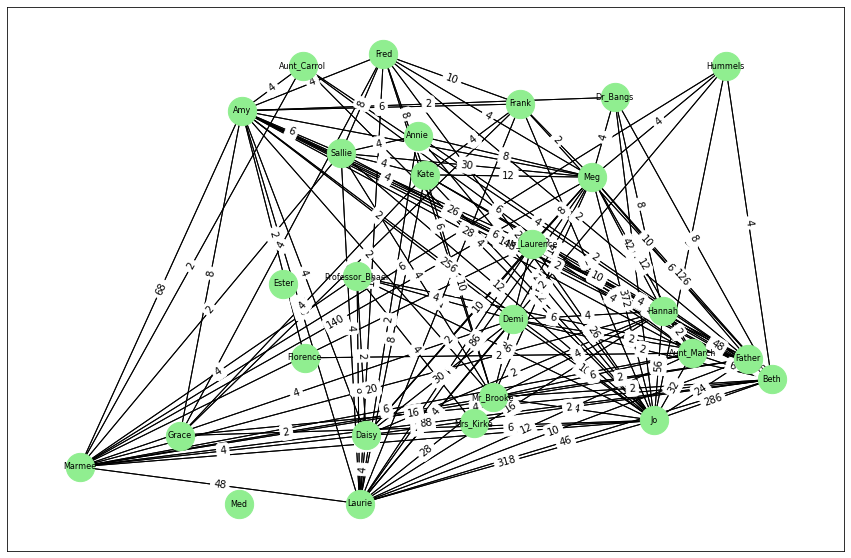

In [13]:
# NetworkX function used to compute the node positions of a graph using the Fruchterman-Reingold force-directed algorithm. 
# G: This is a NetworkX graph object for which we want to compute the node positions.
# k: This is an optional parameter that sets the optimal distance between nodes. Larger values of k result in more space between nodes.
# iterations: This is an optional parameter that sets the number of iterations for which the algorithm should run. 
#Larger values of iterations can result in better node positions, but at the cost of longer computation time.

plt.figure(figsize=(15,10))
pos = nx.fruchterman_reingold_layout(G, k=100, iterations=1)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen") #draws the graph G using the specified layout positions pos for the nodes. It sets the size of each node to 800, the font size of the node labels to 8, and the color of the nodes to "lightgreen"
nx.draw_networkx_edges(G, pos=pos) #draws the edges of the graph G using the same layout positions pos.
edge_labels = nx.get_edge_attributes(G, 'weight') #gets the edge weights from the graph G and stores them as a dictionary in edge_labels
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels) #adds labels to the edges of the graph G using the specified layout positions pos and the dictionary of edge weights edge_labels. The labels are placed near the midpoint of each edge.
plt.show()

c. Calculate the four types of centrality of main protagonists i.e. degree, betweenness, closeness, PageRank

1. Degree Centrality

[('Jo', 0.8461538461538463), ('Beth', 0.8076923076923077), ('Amy', 0.7307692307692308), ('Meg', 0.7307692307692308), ('Laurie', 0.7307692307692308), ('Marmee', 0.6153846153846154), ('Mr_Brooke', 0.5), ('Hannah', 0.5), ('Mr_Laurence', 0.42307692307692313), ('Aunt_March', 0.42307692307692313), ('Father', 0.38461538461538464), ('Daisy', 0.38461538461538464), ('Demi', 0.38461538461538464), ('Kate', 0.38461538461538464), ('Sallie', 0.38461538461538464), ('Fred', 0.38461538461538464), ('Frank', 0.3076923076923077), ('Professor_Bhaer', 0.2692307692307693), ('Grace', 0.23076923076923078), ('Aunt_Carrol', 0.19230769230769232), ('Annie', 0.19230769230769232), ('Dr_Bangs', 0.19230769230769232), ('Hummels', 0.19230769230769232), ('Florence', 0.07692307692307693), ('Mrs_Kirke', 0.038461538461538464), ('Ester', 0.0), ('Med', 0.0)]


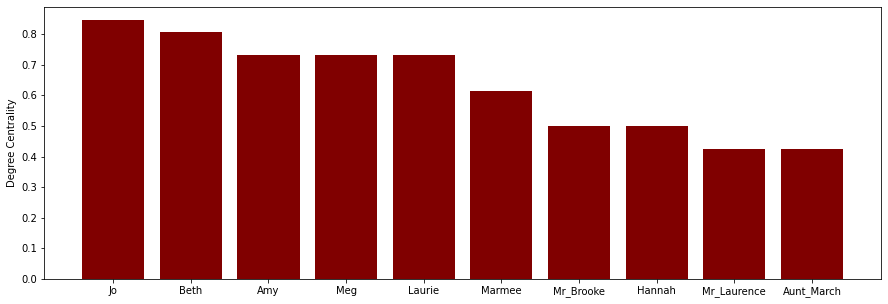

In [14]:
from operator import itemgetter
degc = nx.degree_centrality(G)
fin_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Degree Centrality')
plt.show() 

2. Betweenness Centrality

[('Jo', 0.11698168498168499), ('Amy', 0.09004639804639805), ('Beth', 0.07469108669108668), ('Professor_Bhaer', 0.07111111111111111), ('Laurie', 0.06375091575091577), ('Meg', 0.04705006105006105), ('Marmee', 0.03674114774114774), ('Aunt_March', 0.023034188034188035), ('Hannah', 0.010400488400488399), ('Mr_Brooke', 0.007620268620268621), ('Father', 0.007256410256410256), ('Daisy', 0.006564102564102564), ('Demi', 0.005675213675213675), ('Kate', 0.005241758241758242), ('Sallie', 0.004797924297924298), ('Fred', 0.003635531135531136), ('Mr_Laurence', 0.0018376068376068375), ('Frank', 0.0015256410256410257), ('Grace', 0.0005), ('Mrs_Kirke', 0.0), ('Aunt_Carrol', 0.0), ('Florence', 0.0), ('Ester', 0.0), ('Annie', 0.0), ('Med', 0.0), ('Dr_Bangs', 0.0), ('Hummels', 0.0)]


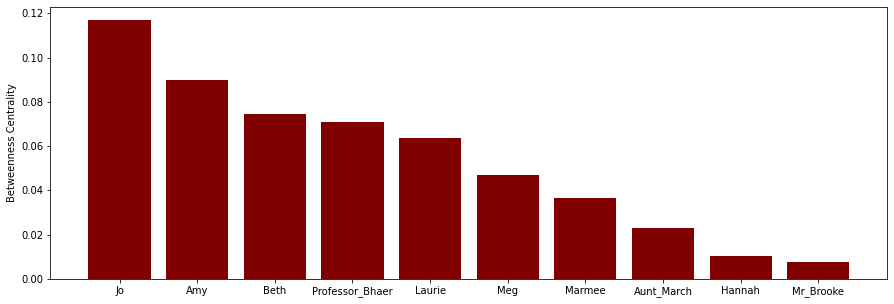

In [15]:
bet = nx.betweenness_centrality(G)
fin_list = sorted(bet.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Betweenness Centrality')
plt.show()

3. Closeness Centrality

[('Jo', 0.8520710059171599), ('Beth', 0.7912087912087912), ('Laurie', 0.7639257294429709), ('Amy', 0.7384615384615385), ('Meg', 0.7384615384615385), ('Marmee', 0.6923076923076923), ('Mr_Brooke', 0.6153846153846154), ('Hannah', 0.6153846153846154), ('Mr_Laurence', 0.582995951417004), ('Father', 0.582995951417004), ('Aunt_March', 0.582995951417004), ('Daisy', 0.582995951417004), ('Demi', 0.582995951417004), ('Sallie', 0.5680473372781065), ('Fred', 0.5680473372781065), ('Kate', 0.5538461538461539), ('Frank', 0.5403377110694184), ('Professor_Bhaer', 0.5274725274725275), ('Grace', 0.5152057245080501), ('Aunt_Carrol', 0.5034965034965034), ('Dr_Bangs', 0.5034965034965034), ('Annie', 0.49230769230769234), ('Hummels', 0.49230769230769234), ('Florence', 0.42603550295857995), ('Mrs_Kirke', 0.34082840236686396), ('Ester', 0.0), ('Med', 0.0)]


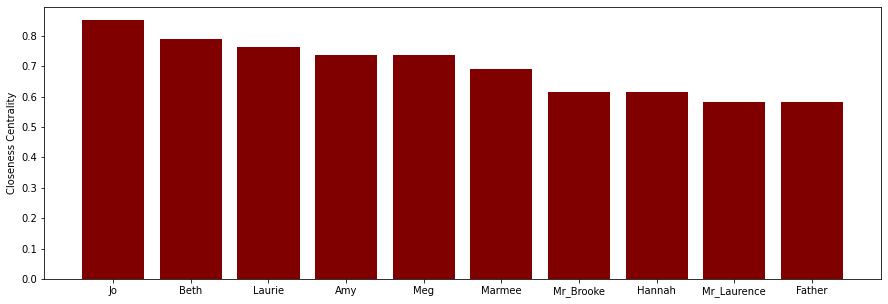

In [16]:
clos = nx.closeness_centrality(G)
fin_list = sorted(clos.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Closeness Centrality')
plt.show()

4. PageRank Centrality


 sorted pagerank:

[('Jo', 0.8461538461538463), ('Beth', 0.8076923076923077), ('Amy', 0.7307692307692308), ('Meg', 0.7307692307692308), ('Laurie', 0.7307692307692308), ('Marmee', 0.6153846153846154), ('Mr_Brooke', 0.5), ('Hannah', 0.5), ('Mr_Laurence', 0.42307692307692313), ('Aunt_March', 0.42307692307692313), ('Father', 0.38461538461538464), ('Daisy', 0.38461538461538464), ('Demi', 0.38461538461538464), ('Kate', 0.38461538461538464), ('Sallie', 0.38461538461538464), ('Fred', 0.38461538461538464), ('Frank', 0.3076923076923077), ('Professor_Bhaer', 0.2692307692307693), ('Grace', 0.23076923076923078), ('Aunt_Carrol', 0.19230769230769232), ('Annie', 0.19230769230769232), ('Dr_Bangs', 0.19230769230769232), ('Hummels', 0.19230769230769232), ('Florence', 0.07692307692307693), ('Mrs_Kirke', 0.038461538461538464), ('Ester', 0.0), ('Med', 0.0)]


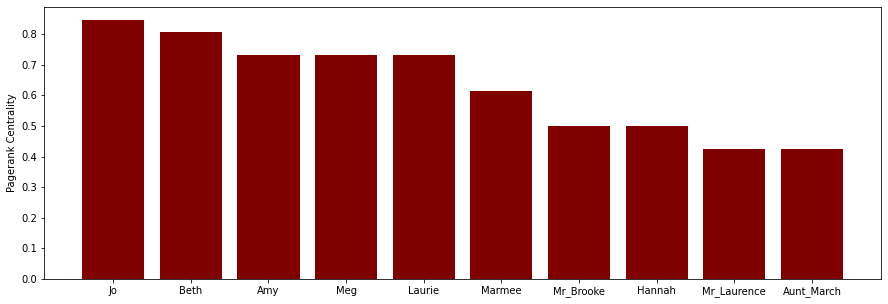

In [17]:
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
fin_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Pagerank Centrality')
plt.show()

d. Calculate the global clustering coefficient of your graph and local clustering coefficient of the main protagonist nodes.

In [18]:
#Local clustering coefficients
d = nx.clustering(G)
print({k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)})

{'Aunt_Carrol': 1.0, 'Florence': 1.0, 'Annie': 1.0, 'Dr_Bangs': 1.0, 'Hummels': 1.0, 'Grace': 0.9333333333333333, 'Mr_Laurence': 0.9090909090909091, 'Frank': 0.8928571428571429, 'Daisy': 0.8666666666666667, 'Demi': 0.8666666666666667, 'Father': 0.8444444444444444, 'Fred': 0.8444444444444444, 'Sallie': 0.8222222222222222, 'Mr_Brooke': 0.7948717948717948, 'Kate': 0.7777777777777778, 'Hannah': 0.7564102564102564, 'Aunt_March': 0.7454545454545455, 'Professor_Bhaer': 0.6666666666666666, 'Marmee': 0.6416666666666667, 'Laurie': 0.5614035087719298, 'Meg': 0.5555555555555556, 'Amy': 0.5146198830409356, 'Beth': 0.49523809523809526, 'Jo': 0.47186147186147187, 'Mrs_Kirke': 0, 'Ester': 0, 'Med': 0}


In [19]:
#Global clsutering coefficients
print(nx.average_clustering(G))

0.7022685945200565


e. Detect communities using the following methods:<br>
i. K - clique (percolation method)<br>
ii. Louvain community detection<br>
iii. Girvann Newman


K - clique (percolation method)

In [20]:
#Clique is a subset of nodes in which each node is connected to all other nodes in the subset.
#Higher the value of k, the fewer the number of communities
#mmunity detection algorithm that finds all the maximal cliques of size k or more in a given graph

from networkx.algorithms.community import k_clique_communities
communities = list(k_clique_communities(G, 2)) #finds all the maximal cliques of size 3 or more in G and stores it in a list called communities
print("Communities found using k-clique method:")
for i, community in enumerate(communities): #enumerate is used to add an index to each community for easy reference
    print(f"Community {i + 1}: {community}")
    print(len(community))

Communities found using k-clique method:
Community 1: frozenset({'Grace', 'Dr_Bangs', 'Jo', 'Mr_Laurence', 'Meg', 'Sallie', 'Father', 'Demi', 'Annie', 'Laurie', 'Daisy', 'Marmee', 'Fred', 'Mrs_Kirke', 'Amy', 'Aunt_March', 'Hummels', 'Professor_Bhaer', 'Hannah', 'Aunt_Carrol', 'Kate', 'Frank', 'Florence', 'Beth', 'Mr_Brooke'})
25


Louvain Community Detection

In [21]:
import community.community_louvain as community_louvain
import pprint
#first compute the best partition
part = community_louvain.best_partition(G)
print(part)
communities = {}
for p in part.keys():
  key = part[p]
  if key in communities:
    communities[key].append(p)
  else:
    communities[key] = [p]

from itertools import zip_longest

# zip all the values together
zl = list(zip_longest(*communities.values()))

# create dataframe
comm_df = pd.DataFrame(zl, columns=communities.keys())
pprint.pprint(communities)
comm_df

{'Jo': 1, 'Beth': 1, 'Amy': 1, 'Meg': 1, 'Laurie': 1, 'Mr_Laurence': 1, 'Marmee': 1, 'Father': 5, 'Mr_Brooke': 3, 'Professor_Bhaer': 5, 'Hannah': 1, 'Aunt_March': 4, 'Daisy': 5, 'Demi': 5, 'Mrs_Kirke': 5, 'Kate': 3, 'Sallie': 3, 'Aunt_Carrol': 4, 'Florence': 4, 'Fred': 3, 'Ester': 0, 'Annie': 3, 'Med': 2, 'Frank': 3, 'Grace': 3, 'Dr_Bangs': 1, 'Hummels': 1}
{0: ['Ester'],
 1: ['Jo',
     'Beth',
     'Amy',
     'Meg',
     'Laurie',
     'Mr_Laurence',
     'Marmee',
     'Hannah',
     'Dr_Bangs',
     'Hummels'],
 2: ['Med'],
 3: ['Mr_Brooke', 'Kate', 'Sallie', 'Fred', 'Annie', 'Frank', 'Grace'],
 4: ['Aunt_March', 'Aunt_Carrol', 'Florence'],
 5: ['Father', 'Professor_Bhaer', 'Daisy', 'Demi', 'Mrs_Kirke']}


,1,5,3,4,0,2
0,Jo,Father,Mr_Brooke,Aunt_March,Ester,Med
1,Beth,Professor_Bhaer,Kate,Aunt_Carrol,None,None
2,Amy,Daisy,Sallie,Florence,None,None
3,Meg,Demi,Fred,None,None,None
4,Laurie,Mrs_Kirke,Annie,None,None,None
5,Mr_Laurence,None,Frank,None,None,None
6,Marmee,None,Grace,None,None,None
7,Hannah,None,None,None,None,None
8,Dr_Bangs,None,None,None,None,None
9,Hummels,None,None,None,None,None


Girvann Newman

In [22]:
from networkx.algorithms.community.centrality import girvan_newman

communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Amy',
  'Annie',
  'Aunt_Carrol',
  'Aunt_March',
  'Beth',
  'Daisy',
  'Demi',
  'Dr_Bangs',
  'Father',
  'Frank',
  'Fred',
  'Grace',
  'Hannah',
  'Hummels',
  'Jo',
  'Kate',
  'Laurie',
  'Marmee',
  'Meg',
  'Mr_Brooke',
  'Mr_Laurence',
  'Professor_Bhaer',
  'Sallie'],
 ['Ester'],
 ['Florence'],
 ['Med'],
 ['Mrs_Kirke']]

f. Find the degree distribution, average shortest path, and size of the largest
component. Also create equivalent generative models to compare against the
social graph that you extracted<br>
i. G(n,p) and G(n,m) generated graph<br>
ii. Preferential attachment<br>
iii. Small-world model



Degree Distribution

In [23]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  27
Edges:  134
Average degree:  4.962962962962963


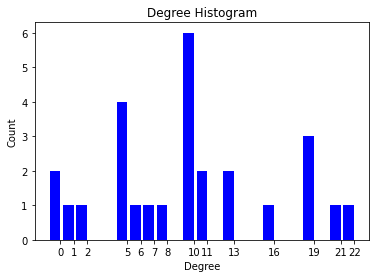

In [24]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(Gcc)  # use layout for largest connected component
plt.axis('off')
plt.show()

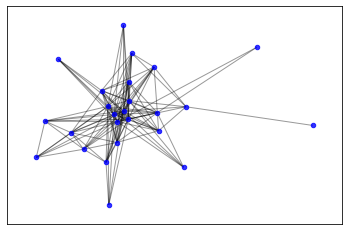

In [25]:
nx.draw_networkx_nodes(Gcc, pos, node_size=20, node_color='b', alpha=0.8)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

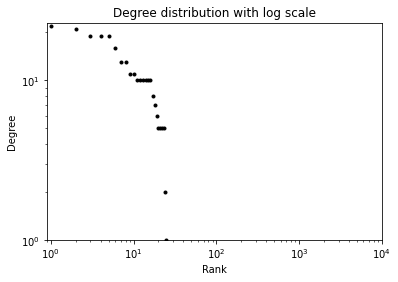

In [26]:
# Degree distribution 

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

Average Shortest Path

In [27]:
#shortest path
import itertools

components = nx.connected_components(G)
print(f"Number of connected components in G: {nx.number_connected_components(G)}")

if nx.number_connected_components(G) > 1:
    for component1, component2 in itertools.combinations(components, 2):
        G.add_edge(next(iter(component1)), next(iter(component2)))

components = nx.connected_components(G)
for i, component in enumerate(components):
    print(f"Nodes in component {i+1}: {component}")
    print(f"Average shortest path length: {nx.average_shortest_path_length(G.subgraph(component))}")


Number of connected components in G: 3
Nodes in component 1: {'Grace', 'Jo', 'Mr_Laurence', 'Med', 'Father', 'Sallie', 'Demi', 'Annie', 'Daisy', 'Fred', 'Mrs_Kirke', 'Aunt_March', 'Hummels', 'Aunt_Carrol', 'Hannah', 'Frank', 'Ester', 'Florence', 'Beth', 'Mr_Brooke', 'Dr_Bangs', 'Meg', 'Laurie', 'Marmee', 'Amy', 'Professor_Bhaer', 'Kate'}
Average shortest path length: 1.7806267806267806


Size of largest component

In [39]:
largest = max(nx.connected_components(G), key=len)
len(largest)

27

i. G(n,p) and G(n,m) generated graph

In [29]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Define parameters for generative models
# #larger values of n will result in larger and more complex graphs, while larger values of p and m will result in denser graphs with more edges.
# n = 100  # Number of nodes
# p = 0.05  # Probability of edge creation in G(n,p)
# m = 4   # Number of edges to attach from a new node in G(n,m)

# # Generate random graphs using different generative models
# gnp = nx.gnp_random_graph(n, p)
# gnm = nx.gnm_random_graph(n, m)

# # Print number of edges in each generated graph
# print(f"G(n,p) has {nx.number_of_edges(gnp)} edges")
# print(f"G(n,m) has {nx.number_of_edges(gnm)} edges")

# # Visualize the generated graphs
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #subplots creates a 1x2 grid of subplots

# nx.draw(gnp, ax=axes[0]) #draws each generated graph on a separate subplot using the ax parameter
# nx.draw(gnm, ax=axes[1]) #ax specifies the subplot on which to draw the graph

# axes[0].set_title(f"G(n,p) with {nx.number_of_edges(gnp)} edges")
# axes[1].set_title(f"G(n,m) with {nx.number_of_edges(gnm)} edges")

# plt.show()

Node  Jo  : Degree is  22
Node  Beth  : Degree is  21
Node  Amy  : Degree is  19
Node  Meg  : Degree is  19
Node  Laurie  : Degree is  19


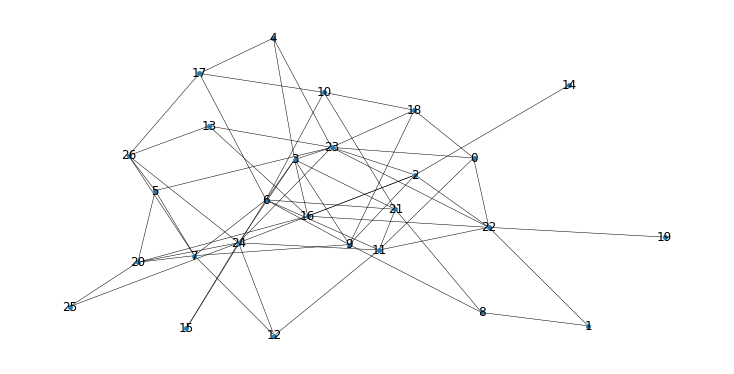

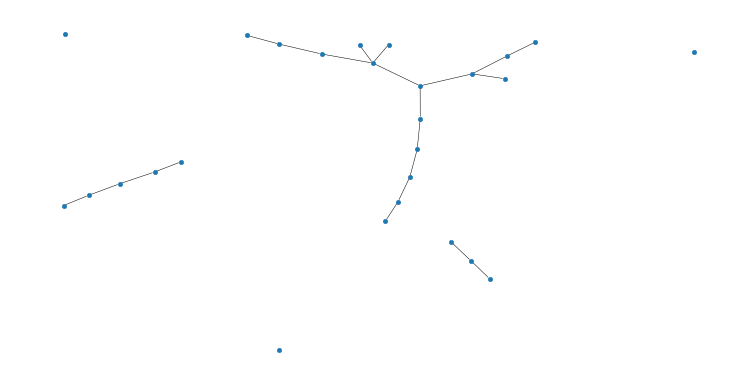

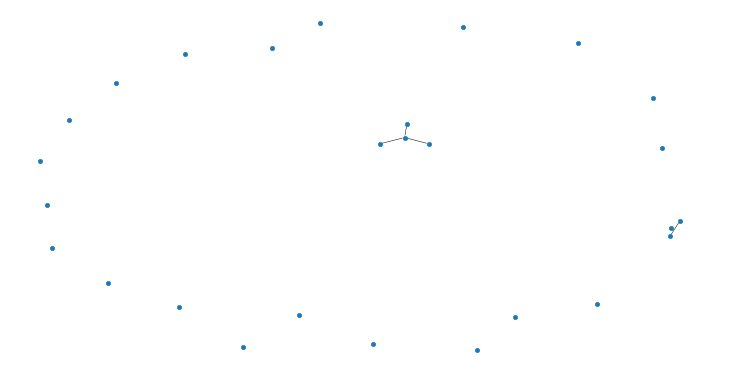

In [30]:
#this only generates G(n,p) random graph with the same no of edges and nodes as the graph G

#calculates degree of each node and then the average degree of the network G
degree_list = list(nx.degree(G))
#print(degree_list)
n=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/n
avg_degree

#Calculates the probability of edge creation p for generating a random graph with the same number of nodes and average degree as the given network
p=avg_degree/(n-1) 
G2 = nx.gnp_random_graph(n,p)
fig = plt.figure(figsize =(10 ,5))
nx.draw(G2, with_labels = True, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

#Make random graph for G(n,p)
G2 = nx.gnp_random_graph(n,0.05) 
fig = plt.figure(figsize =(10 ,5))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

#make random graph for G(n,m)
m=4
G3 = nx.gnm_random_graph(n,m)
fig = plt.figure(figsize =(10 ,5))
nx.draw(G3, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

ii. Preferential attachment

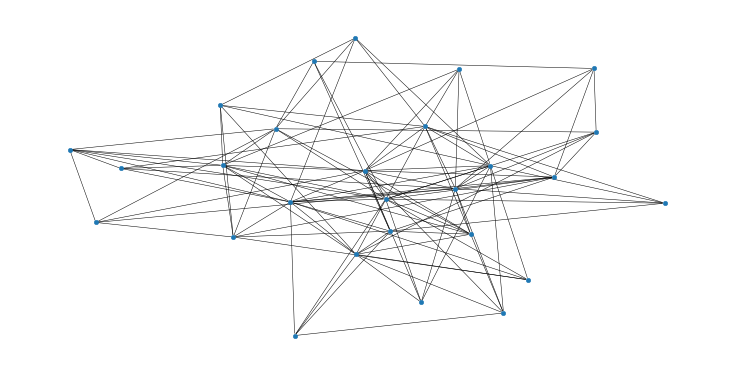

In [31]:
#Barabási-Albert algorithm-generative model that creates a random graph with a power-law degree distribution
#new nodes are added to the graph one at a time, and each new node is connected to existing nodes with a probability that is proportional to the number of connections of those nodes
# import networkx as nx
# import matplotlib.pyplot as plt
# n = 1000  
# m0 = 2   #small connected graph
# pa = nx.barabasi_albert_graph(n, m0)
# print(f"Preferential attachment has {nx.number_of_edges(pa)} edges")
# # Visualize the graph
# plt.figure(figsize=(5, 5))
# nx.draw(pa, node_size=20)
# plt.title(f"Preferential attachment with {nx.number_of_edges(pa)} edges")
# plt.show()

neighbours=5
H1 = nx.barabasi_albert_graph(n,neighbours)
fig = plt.figure(figsize =(10 ,5))
nx.draw(H1, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

iii. Small-world model

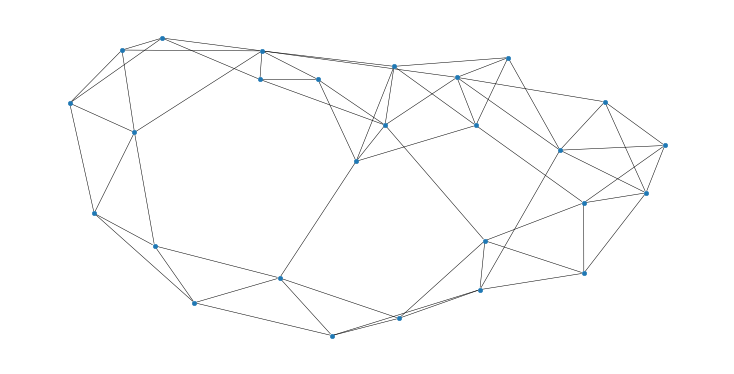

In [32]:
# import networkx as nx
# import numpy as np
# import matplotlib.pyplot as plt
# n = 1000    
# m = 4     
# p_rewire = 0.1  
# sw = nx.connected_watts_strogatz_graph(n, m, p_rewire)
# print(f"Small-world model has {nx.number_of_edges(sw)} edges")
# pos = nx.spring_layout(sw)
# nx.draw(sw, pos, node_size=10, node_color='b', edge_color='gray', alpha=0.5, with_labels=False) #alpha controls the opacity of the graph elements such as nodes and edges, 0 means completely transparent and 1 means completely opaque, 0.5 is semi-transparent allowing the underlying structure of the graph to be more visible
# plt.show()

H2 = nx.newman_watts_strogatz_graph(n,neighbours,p)
fig = plt.figure(figsize =(10 ,5))

nx.draw(H2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [33]:
#transitivity comparison 
print(nx.transitivity(G))
print(nx.transitivity(H1))
print(nx.transitivity(H2))
print(nx.average_clustering(G))
print(nx.average_clustering(H1))
print(nx.average_clustering(H2))
print(nx.diameter(G))
print(nx.diameter(H1))
print(nx.diameter(H2))
print(nx.degree_pearson_correlation_coefficient(G))
print(nx.degree_pearson_correlation_coefficient(H1))
print(nx.degree_pearson_correlation_coefficient(H2))

0.638150289017341
0.34676564156945916
0.375
0.7616160372008325
0.3913586413586414
0.4231040564373898
4
3
5
-0.2521938268852725
-0.25871973066266685
-0.026392961876832828


#### Ego networks

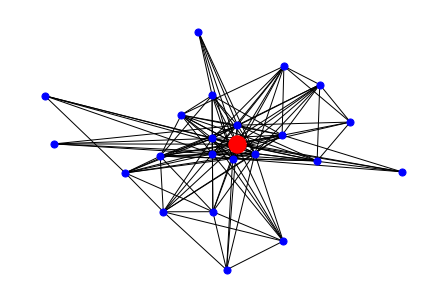

In [34]:
s='Jo'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Jo.png')
plt.show()
nx.write_gml(hub_ego,"egonw_Jo.gml")

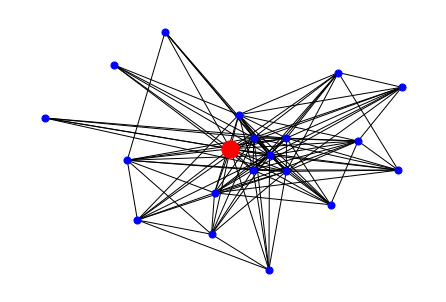

In [35]:
s='Meg'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Meg.png')
plt.show()
nx.write_gml(hub_ego,"egonw_Meg.gml")

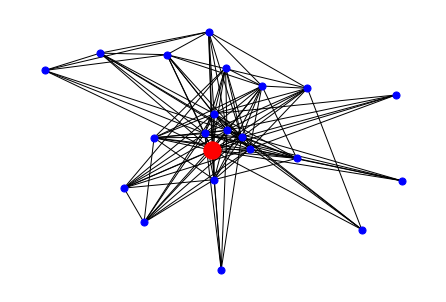

In [36]:
s='Beth'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Beth.png')
plt.show()
nx.write_gml(hub_ego,"egonw_Beth.gml")

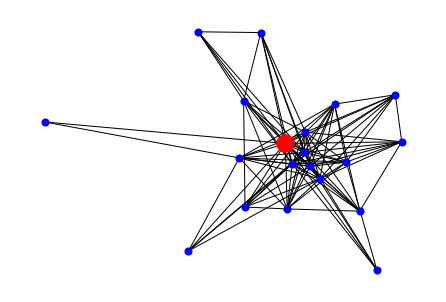

In [37]:
s='Amy'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Amy.png')
plt.show()
nx.write_gml(hub_ego,"egonw_Amy.gml")

# Section 2: Analysis

#### a. Who are the protagonists as per your analysis? If the 4 centralities are not having high correlation, how do you interpret them?

Given the centrality measures, it would be safe to assume that the 4 March sisters, Jo, Meg, Beth and Amy are the main characters/protagonists of the book "Little Women". <br>
When the centrality measures do not exhibit high correlation, we review each measure by revisiting their definations, purpose and any assumptions made during their measurement. It be helpful to look for patterns in the data as it would enable us to interpret and derive a conclusion in a broader context.

#### b. What do the clustering coefficients, discovered communities, extracted ego network of protagonists and average shortest path tell you about the dynamics in the story? How is clustering coefficient related to transitivity of nodes?

#### c. Compare all the generated graphs (from (f)) to the actual graph. Is there a difference, and if yes, what can it be attributed to? Also, analyze the differences between the 3 generated graph’s attributes.


#### d. Feel free to do any appropriate visualization using Gephi only to substantiate your analysis